🚀 Starting Infrastructure Health Monitor...
📊 Generating health dashboard...
✅ Dashboard saved as 'infrastructure_health_dashboard.png'


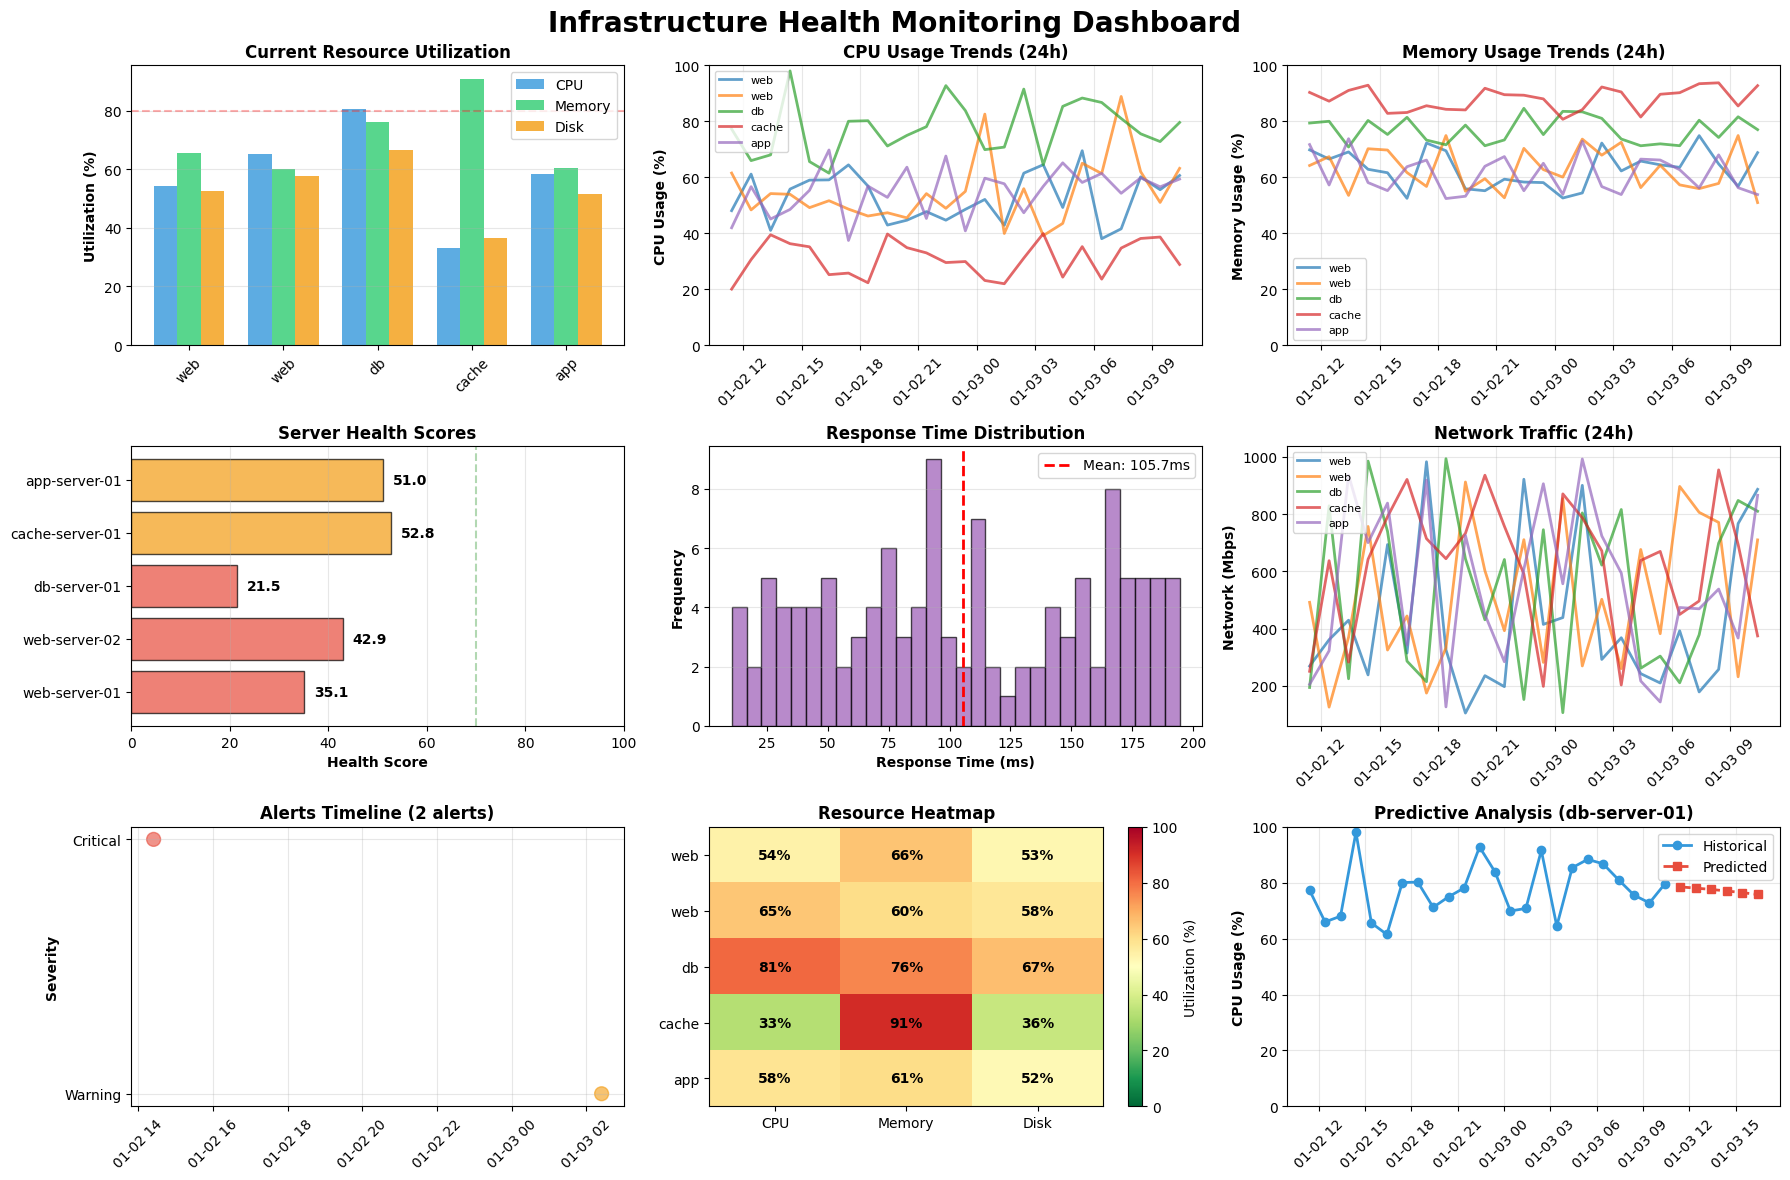


                         INFRASTRUCTURE HEALTH REPORT

🖥️  Server: web-server-01
   IP: 192.168.1.164
   Health Score: 35.06/100
   CPU: 60.6% | Memory: 68.8% | Disk: 45.8%
   Status: 🔴 CRITICAL

🖥️  Server: web-server-02
   IP: 192.168.1.221
   Health Score: 42.92/100
   CPU: 63.2% | Memory: 50.9% | Disk: 58.1%
   Status: 🔴 CRITICAL

🖥️  Server: db-server-01
   IP: 192.168.1.150
   Health Score: 21.49/100
   CPU: 79.6% | Memory: 77.0% | Disk: 62.8%
   Status: 🔴 CRITICAL

🖥️  Server: cache-server-01
   IP: 192.168.1.60
   Health Score: 52.77/100
   CPU: 28.8% | Memory: 92.7% | Disk: 42.2%
   Status: 🟡 WARNING

🖥️  Server: app-server-01
   IP: 192.168.1.166
   Health Score: 51.04/100
   CPU: 59.4% | Memory: 53.8% | Disk: 53.8%
   Status: 🟡 WARNING

⚠️  Total Alerts: 2
🔴 Critical Alerts: 1


✅ Monitoring complete!


In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from datetime import datetime, timedelta
import numpy as np
import random
from collections import defaultdict

class InfraMonitor:
    def __init__(self):
        self.servers = {}
        self.metrics_history = defaultdict(lambda: defaultdict(list))
        self.alerts = []

    def add_server(self, name, ip_address):
        """Add a server to monitor"""
        self.servers[name] = {
            'ip': ip_address,
            'status': 'online',
            'health_score': 100
        }

    def simulate_metrics(self, hours=24):
        """Simulate infrastructure metrics"""
        servers = ['web-server-01', 'web-server-02', 'db-server-01',
                   'cache-server-01', 'app-server-01']

        for server in servers:
            self.add_server(server, f"192.168.1.{random.randint(10, 250)}")

            for hour in range(hours):
                timestamp = datetime.now() - timedelta(hours=hours-hour)

                # Simulate different patterns for different servers
                if 'db' in server:
                    # Database servers - higher CPU, variable memory
                    cpu = random.uniform(60, 90) + random.uniform(-10, 10) * np.sin(hour/3)
                    memory = random.uniform(70, 85)
                    disk = random.uniform(60, 75)
                elif 'cache' in server:
                    # Cache servers - high memory, low CPU
                    cpu = random.uniform(20, 40)
                    memory = random.uniform(80, 95)
                    disk = random.uniform(30, 45)
                else:
                    # Web/App servers - moderate usage
                    cpu = random.uniform(40, 70) + random.uniform(-5, 5) * np.sin(hour/4)
                    memory = random.uniform(50, 75)
                    disk = random.uniform(45, 65)

                # Add some anomalies
                if random.random() < 0.05:  # 5% chance of spike
                    cpu = min(98, cpu + random.uniform(20, 30))
                    if cpu > 90:
                        self.alerts.append({
                            'timestamp': timestamp,
                            'server': server,
                            'metric': 'CPU',
                            'value': cpu,
                            'severity': 'critical' if cpu > 95 else 'warning'
                        })

                network = random.uniform(100, 1000)  # Mbps
                response_time = random.uniform(10, 200)  # ms

                self.metrics_history[server]['cpu'].append({
                    'timestamp': timestamp, 'value': cpu
                })
                self.metrics_history[server]['memory'].append({
                    'timestamp': timestamp, 'value': memory
                })
                self.metrics_history[server]['disk'].append({
                    'timestamp': timestamp, 'value': disk
                })
                self.metrics_history[server]['network'].append({
                    'timestamp': timestamp, 'value': network
                })
                self.metrics_history[server]['response_time'].append({
                    'timestamp': timestamp, 'value': response_time
                })

    def calculate_health_score(self, server):
        """Calculate overall health score for a server"""
        if server not in self.metrics_history:
            return 0

        latest_cpu = self.metrics_history[server]['cpu'][-1]['value']
        latest_memory = self.metrics_history[server]['memory'][-1]['value']
        latest_disk = self.metrics_history[server]['disk'][-1]['value']
        latest_response = self.metrics_history[server]['response_time'][-1]['value']

        # Calculate component scores (100 = best)
        cpu_score = max(0, 100 - latest_cpu)
        memory_score = max(0, 100 - latest_memory)
        disk_score = max(0, 100 - latest_disk)
        response_score = max(0, 100 - (latest_response / 2))

        # Weighted average
        health_score = (cpu_score * 0.3 + memory_score * 0.3 +
                       disk_score * 0.2 + response_score * 0.2)

        return health_score

    def generate_health_report(self):
        """Generate comprehensive infrastructure health dashboard"""
        fig = plt.figure(figsize=(18, 12))
        fig.suptitle('Infrastructure Health Monitoring Dashboard',
                     fontsize=20, fontweight='bold')

        servers = list(self.metrics_history.keys())

        # 1. Real-time Resource Utilization
        ax1 = plt.subplot(3, 3, 1)
        metrics_avg = {server: {
            'CPU': np.mean([m['value'] for m in self.metrics_history[server]['cpu'][-6:]]),
            'Memory': np.mean([m['value'] for m in self.metrics_history[server]['memory'][-6:]]),
            'Disk': np.mean([m['value'] for m in self.metrics_history[server]['disk'][-6:]])
        } for server in servers}

        x = np.arange(len(servers))
        width = 0.25

        cpu_vals = [metrics_avg[s]['CPU'] for s in servers]
        mem_vals = [metrics_avg[s]['Memory'] for s in servers]
        disk_vals = [metrics_avg[s]['Disk'] for s in servers]

        ax1.bar(x - width, cpu_vals, width, label='CPU', color='#3498db', alpha=0.8)
        ax1.bar(x, mem_vals, width, label='Memory', color='#2ecc71', alpha=0.8)
        ax1.bar(x + width, disk_vals, width, label='Disk', color='#f39c12', alpha=0.8)

        ax1.set_ylabel('Utilization (%)', fontweight='bold')
        ax1.set_title('Current Resource Utilization', fontweight='bold')
        ax1.set_xticks(x)
        ax1.set_xticklabels([s.split('-')[0] for s in servers], rotation=45)
        ax1.legend()
        ax1.axhline(y=80, color='red', linestyle='--', alpha=0.3, label='Threshold')
        ax1.grid(axis='y', alpha=0.3)

        # 2. CPU Trends
        ax2 = plt.subplot(3, 3, 2)
        for server in servers:
            cpu_data = self.metrics_history[server]['cpu']
            times = [d['timestamp'] for d in cpu_data]
            values = [d['value'] for d in cpu_data]
            ax2.plot(times, values, label=server.split('-')[0], linewidth=2, alpha=0.7)

        ax2.set_ylabel('CPU Usage (%)', fontweight='bold')
        ax2.set_title('CPU Usage Trends (24h)', fontweight='bold')
        ax2.legend(loc='best', fontsize=8)
        ax2.grid(True, alpha=0.3)
        ax2.set_ylim(0, 100)
        plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)

        # 3. Memory Trends
        ax3 = plt.subplot(3, 3, 3)
        for server in servers:
            mem_data = self.metrics_history[server]['memory']
            times = [d['timestamp'] for d in mem_data]
            values = [d['value'] for d in mem_data]
            ax3.plot(times, values, label=server.split('-')[0], linewidth=2, alpha=0.7)

        ax3.set_ylabel('Memory Usage (%)', fontweight='bold')
        ax3.set_title('Memory Usage Trends (24h)', fontweight='bold')
        ax3.legend(loc='best', fontsize=8)
        ax3.grid(True, alpha=0.3)
        ax3.set_ylim(0, 100)
        plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45)

        # 4. Health Score Matrix
        ax4 = plt.subplot(3, 3, 4)
        health_scores = [self.calculate_health_score(s) for s in servers]
        colors = ['#2ecc71' if hs >= 70 else '#f39c12' if hs >= 50 else '#e74c3c'
                  for hs in health_scores]

        bars = ax4.barh(servers, health_scores, color=colors, alpha=0.7, edgecolor='black')
        ax4.set_xlabel('Health Score', fontweight='bold')
        ax4.set_title('Server Health Scores', fontweight='bold')
        ax4.set_xlim(0, 100)
        ax4.axvline(x=70, color='green', linestyle='--', alpha=0.3)
        ax4.grid(axis='x', alpha=0.3)

        for i, bar in enumerate(bars):
            width = bar.get_width()
            ax4.text(width + 2, bar.get_y() + bar.get_height()/2,
                    f'{width:.1f}', ha='left', va='center', fontweight='bold')

        # 5. Response Time Distribution
        ax5 = plt.subplot(3, 3, 5)
        all_response_times = []
        for server in servers:
            rt_data = [d['value'] for d in self.metrics_history[server]['response_time']]
            all_response_times.extend(rt_data)

        ax5.hist(all_response_times, bins=30, color='#9b59b6', alpha=0.7, edgecolor='black')
        ax5.set_xlabel('Response Time (ms)', fontweight='bold')
        ax5.set_ylabel('Frequency', fontweight='bold')
        ax5.set_title('Response Time Distribution', fontweight='bold')
        ax5.axvline(x=np.mean(all_response_times), color='red', linestyle='--',
                   linewidth=2, label=f'Mean: {np.mean(all_response_times):.1f}ms')
        ax5.legend()
        ax5.grid(axis='y', alpha=0.3)

        # 6. Network Traffic
        ax6 = plt.subplot(3, 3, 6)
        for server in servers:
            net_data = self.metrics_history[server]['network']
            times = [d['timestamp'] for d in net_data]
            values = [d['value'] for d in net_data]
            ax6.plot(times, values, label=server.split('-')[0], linewidth=2, alpha=0.7)

        ax6.set_ylabel('Network (Mbps)', fontweight='bold')
        ax6.set_title('Network Traffic (24h)', fontweight='bold')
        ax6.legend(loc='best', fontsize=8)
        ax6.grid(True, alpha=0.3)
        plt.setp(ax6.xaxis.get_majorticklabels(), rotation=45)

        # 7. Alert Timeline
        ax7 = plt.subplot(3, 3, 7)
        if self.alerts:
            alert_times = [a['timestamp'] for a in self.alerts]
            alert_severities = [1 if a['severity'] == 'warning' else 2 for a in self.alerts]
            colors_alert = ['#f39c12' if s == 1 else '#e74c3c' for s in alert_severities]

            ax7.scatter(alert_times, alert_severities, c=colors_alert, s=100, alpha=0.6)
            ax7.set_ylabel('Severity', fontweight='bold')
            ax7.set_title(f'Alerts Timeline ({len(self.alerts)} alerts)', fontweight='bold')
            ax7.set_yticks([1, 2])
            ax7.set_yticklabels(['Warning', 'Critical'])
            ax7.grid(True, alpha=0.3)
            plt.setp(ax7.xaxis.get_majorticklabels(), rotation=45)
        else:
            ax7.text(0.5, 0.5, 'No Alerts', ha='center', va='center',
                    fontsize=16, color='green', fontweight='bold')
            ax7.set_title('Alerts Timeline', fontweight='bold')

        # 8. Resource Utilization Heatmap
        ax8 = plt.subplot(3, 3, 8)
        heatmap_data = []
        for server in servers:
            server_data = [
                np.mean([m['value'] for m in self.metrics_history[server]['cpu'][-6:]]),
                np.mean([m['value'] for m in self.metrics_history[server]['memory'][-6:]]),
                np.mean([m['value'] for m in self.metrics_history[server]['disk'][-6:]])
            ]
            heatmap_data.append(server_data)

        im = ax8.imshow(heatmap_data, cmap='RdYlGn_r', aspect='auto', vmin=0, vmax=100)
        ax8.set_xticks(np.arange(3))
        ax8.set_yticks(np.arange(len(servers)))
        ax8.set_xticklabels(['CPU', 'Memory', 'Disk'])
        ax8.set_yticklabels([s.split('-')[0] for s in servers])
        ax8.set_title('Resource Heatmap', fontweight='bold')

        # Add text annotations
        for i in range(len(servers)):
            for j in range(3):
                text = ax8.text(j, i, f'{heatmap_data[i][j]:.0f}%',
                              ha="center", va="center", color="black", fontweight='bold')

        plt.colorbar(im, ax=ax8, label='Utilization (%)')

        # 9. Predictive Analysis
        ax9 = plt.subplot(3, 3, 9)
        # Predict next 6 hours based on trend
        server_to_predict = servers[2]  # db-server
        cpu_history = [d['value'] for d in self.metrics_history[server_to_predict]['cpu']]

        # Simple linear regression for prediction
        x_hist = np.arange(len(cpu_history))
        z = np.polyfit(x_hist, cpu_history, 2)
        p = np.poly1d(z)

        x_future = np.arange(len(cpu_history), len(cpu_history) + 6)
        predicted = p(x_future)

        times_hist = [d['timestamp'] for d in self.metrics_history[server_to_predict]['cpu']]
        times_future = [times_hist[-1] + timedelta(hours=i+1) for i in range(6)]

        ax9.plot(times_hist, cpu_history, 'o-', label='Historical',
                linewidth=2, color='#3498db')
        ax9.plot(times_future, predicted, 's--', label='Predicted',
                linewidth=2, color='#e74c3c')
        ax9.set_ylabel('CPU Usage (%)', fontweight='bold')
        ax9.set_title(f'Predictive Analysis ({server_to_predict})', fontweight='bold')
        ax9.legend()
        ax9.grid(True, alpha=0.3)
        ax9.set_ylim(0, 100)
        plt.setp(ax9.xaxis.get_majorticklabels(), rotation=45)

        plt.tight_layout()
        plt.savefig('infrastructure_health_dashboard.png', dpi=300, bbox_inches='tight')
        print("✅ Dashboard saved as 'infrastructure_health_dashboard.png'")
        plt.show()

    def generate_text_report(self):
        """Generate detailed text report"""
        print("\n" + "="*80)
        print(" "*25 + "INFRASTRUCTURE HEALTH REPORT")
        print("="*80 + "\n")

        for server in self.metrics_history.keys():
            health_score = self.calculate_health_score(server)
            latest_cpu = self.metrics_history[server]['cpu'][-1]['value']
            latest_mem = self.metrics_history[server]['memory'][-1]['value']
            latest_disk = self.metrics_history[server]['disk'][-1]['value']

            status = "🟢 HEALTHY" if health_score >= 70 else "🟡 WARNING" if health_score >= 50 else "🔴 CRITICAL"

            print(f"🖥️  Server: {server}")
            print(f"   IP: {self.servers[server]['ip']}")
            print(f"   Health Score: {health_score:.2f}/100")
            print(f"   CPU: {latest_cpu:.1f}% | Memory: {latest_mem:.1f}% | Disk: {latest_disk:.1f}%")
            print(f"   Status: {status}")
            print()

        print(f"⚠️  Total Alerts: {len(self.alerts)}")
        critical_alerts = sum(1 for a in self.alerts if a['severity'] == 'critical')
        print(f"🔴 Critical Alerts: {critical_alerts}")
        print("\n" + "="*80 + "\n")

# Main execution
if __name__ == "__main__":
    print("🚀 Starting Infrastructure Health Monitor...")

    monitor = InfraMonitor()
    monitor.simulate_metrics(hours=24)

    print("📊 Generating health dashboard...")
    monitor.generate_health_report()

    monitor.generate_text_report()

    print("✅ Monitoring complete!")